/home/topalidis/.pyenv/versions/3.11.12/lib/python3.11/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


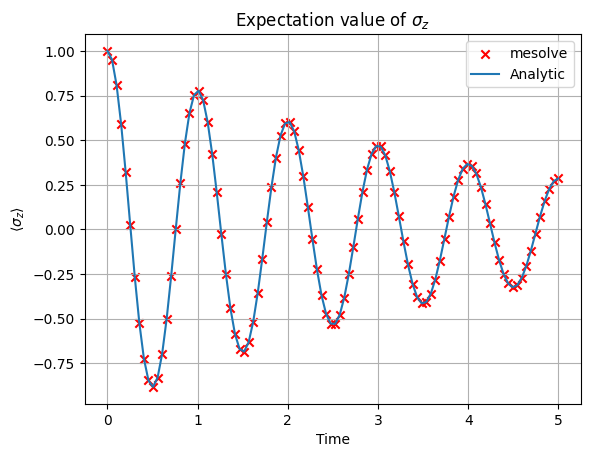

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from qutip import Bloch, about, basis, mesolve, sigmam, sigmax, sigmay, sigmaz

Delta = 2 * np.pi
hbar = 1.0 
gamma = 0.25 

t_span = (0, 5)
t_eval = np.linspace(*t_span, 100)

def drho_dt(t, y):
    rho11, rho22, rho12_real, rho12_imag = y
    rho12 = rho12_real + 1j * rho12_imag
    rho21 = np.conj(rho12)

    drho11_dt = -1j * (Delta / (2 * hbar)) * (rho21 - rho12)
    drho22_dt = 1j * (Delta / (2 * hbar)) * (rho21 - rho12)
    drho12_dt = -1j * (Delta / (2 * hbar)) * (rho22 - rho11) - 2 * gamma * rho12

    return [
        drho11_dt.real,
        drho22_dt.real,
        drho12_dt.real,
        drho12_dt.imag
    ]

#----Analytic solution----
rho11_0 = 1.0
rho22_0 = 0.0
rho12_0 = 0.0 + 0.0j

y0 = [rho11_0, rho22_0, rho12_0.real, rho12_0.imag]

analytic_density_matrix_solution = solve_ivp(drho_dt, t_span, y0, t_eval=t_eval)

rho11 = analytic_density_matrix_solution.y[0]
rho22 = analytic_density_matrix_solution.y[1]

sigma_z_analytic = rho11 - rho22

#----QuTip solution----
H = Delta / 2.0 * sigmax()
c_ops = [np.sqrt(gamma) * sigmaz()]
psi0 = basis(2, 0)
qutip_density_matrix_solution = mesolve(H, psi0, t_eval, c_ops, [sigmaz()])
sigma_z_qutip = qutip_density_matrix_solution.expect[0]

#----Plotting----
plt.scatter(t_eval, sigma_z_qutip, c="r", marker="x", label="mesolve")
plt.plot(analytic_density_matrix_solution.t, sigma_z_analytic, label="Analytic")
plt.xlabel('Time')
plt.ylabel(r'$\langle \sigma_z \rangle$')
plt.title(r'Expectation value of $\sigma_z$')
plt.grid(True)
plt.legend()
plt.show()